### Text detection using EasyOCR

In [19]:
#!pip install easyocr

import cv2
import easyocr
import matplotlib.pyplot as plt
import time

Using CPU. Note: This module is much faster with a GPU.


Detected text:  LOVE THE WAY
--> bbox coordinates:  [[71, 5], [271, 5], [271, 47], [71, 47]] 

Detected text:  YOUR WRINKLE CREAM
--> bbox coordinates:  [[373, 5], [688, 5], [688, 47], [373, 47]] 

Detected text:  LOOK HOW MANY
--> bbox coordinates:  [[771, 7], [1009, 7], [1009, 47], [771, 47]] 

Detected text:  YOU SMELL TODAY 
--> bbox coordinates:  [[47, 309], [295, 309], [295, 351], [47, 351]] 

Detected text:  IS WORKING GREAT
--> bbox coordinates:  [[395, 309], [664, 309], [664, 351], [395, 351]] 

Detected text:  PEOPLE LOVE YOU
--> bbox coordinates:  [[771, 310], [1009, 310], [1009, 351], [771, 351]] 



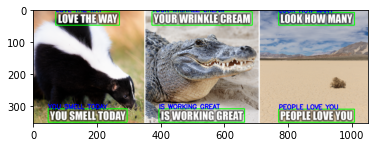

--- 12.528074026107788 seconds ---


In [26]:
# read image
image_path = 'img_02.png'
img = cv2.imread(image_path)

# Mark start time
start_time = time.time()

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# detect text on image
# The readtext method returns a list of tuples
# Each tuple consists of the coordinates of a bounding box, the text, and a score.
textList = reader.readtext(img)

threshold = 0.50

# draw bbox and text
for _, t in enumerate(textList):

    bbox, text, score = t

    print("Detected text: ", text)
    print("--> bbox coordinates: ", bbox, "\n")
    
    if score > threshold:
        # cv2.rectangle(img, upper left, upper right, color, thickness)
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 2)
        # Put a label to the bbox
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2)
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

# Calculate the elapsed time
print("--- %s seconds ---" % (time.time() - start_time))
